In [2]:
import iyer_saliency
import sarfa_saliency

import chess 
import chess.uci
import time

from sys import platform as _platform
from collections import defaultdict


from IPython.display import Image, display
import cairosvg
import cv2
import svg_custom.svg_custom as svg_custom 
import matplotlib.pyplot as plt
import numpy as np

import json 
import pandas as pd 
from pandas.io.json import json_normalize 

from collections import defaultdict



In [3]:
def select_engine():
    handler = chess.uci.InfoHandler()
    if _platform == "linux" or _platform == "linux2":

        engine = chess.uci.popen_engine('engines/stockfish-11-linux/stockfish-11-linux/Linux/stockfish_20011801_x64')

    elif _platform == "darwin":
        engine = chess.uci.popen_engine('engines/stockfish-11-mac/stockfish-11-mac/Mac/stockfish-11-64')

    elif _platform == "win32":
        engine = chess.uci.popen_engine('engines/stockfish-11-win/stockfish-11-win/Windows/stockfish_20011801_32bit.exe') 

    elif _platform == "win64":
        engine = chess.uci.popen_engine('engines/stockfish-11-win/stockfish-11-win/Windows/stockfish_20011801_x64.exe')
    engine.setoption({'MultiPV': 100})
    engine.info_handlers.append(handler)
    return handler,engine

In [4]:

def get_dict_q_vals(board, legal_moves, eval_time, original_move,engine,handler):
    """
    Function returns Q-values in given board position
    Input:
        board: chess.Board()
        legal_moves: List of legal moves of original state
        eval_time: Search time for stockfish
        original_move: original best move (chess.Move()) 
    Output:
        q_vals_dict: Dictionary containing Q-values and Actions
        bestmove: chess.Move() - Best move in given board position
    """
    
    i = 0
    q_vals_dict = {}
    
    
    set_current_legal_moves = set(board.legal_moves)
    set_original_legal_moves = set(legal_moves)
    intersection_set = set_current_legal_moves.intersection(set_original_legal_moves)

    #print('querying engine with perturbed position')
    engine.position(board)
    evaluation = engine.go(movetime=eval_time)
    #print(evaluation)
    if original_move is None:
        # no initial move supplied
        original_move = evaluation.bestmove
    dict_moves_to_score = defaultdict(int)
    
    for move_id in handler.info['pv'].keys():
        move_string = str(handler.info['pv'][move_id][0])
        move_score = 0
        if handler.info["score"][move_id].cp is None:
            mate_in_moves = handler.info["score"][move_id].mate
            if mate_in_moves > 0:
                # white will win in some number of moves
                move_score = 40
            else:
                # black will win 
                move_score = -40
        else:
            move_score = round(handler.info["score"][move_id].cp/100.0,2)
        dict_moves_to_score[move_string] = move_score
    
    #print(dict_moves_to_score)
    
    #print('Total Legal Moves : ', len(intersection_set))

    for el in legal_moves:
        if el in intersection_set:
            i += 1
            score = dict_moves_to_score[str(el)]
            q_vals_dict[el.uci()] = score
    
    return q_vals_dict, evaluation.bestmove

In [5]:
def computeSaliency(FEN = 'rnbq1rk1/pp2bppp/4p3/3p3n/3P1B2/3B1N2/PPPNQPPP/R3K2R w KQkq - 0 1',typeSal='sarfa',engine= chess.uci.popen_engine('engines/stockfish-11-linux/stockfish-11-linux/Linux/stockfish_20011801_x64'),handler=None):
    """
    Function returns saliency map for given board position  
    Input:
        FEN : Board position encoded in a FEN  
    Output:
        answer : Saliency for each location on the board
    """

    print("***********************", FEN, "**********************")
    board = chess.Board(FEN)
    evaltime = 6000
    legal_moves = list(board.legal_moves)[:]

    # Q-values for original state
    dict_q_values_before_perturbation, original_move  = get_dict_q_vals(board, legal_moves, evaltime, None,engine,handler)
    #print('original move = ', original_move)
    
    # Saliency for each board location
    answer = {
        'a1' : {'int': chess.A1, 'saliency': -2},
        'a2' : {'int': chess.A2, 'saliency': -2},
        'a3' : {'int': chess.A3, 'saliency': -2},
        'a4' : {'int': chess.A4, 'saliency': -2},
        'a5' : {'int': chess.A5, 'saliency': -2},
        'a6' : {'int': chess.A6, 'saliency': -2},
        'a7' : {'int': chess.A7, 'saliency': -2},
        'a8' : {'int': chess.A8, 'saliency': -2},
        'b1' : {'int': chess.B1, 'saliency': -2},
        'b2' : {'int': chess.B2, 'saliency': -2},
        'b3' : {'int': chess.B3, 'saliency': -2},
        'b4' : {'int': chess.B4, 'saliency': -2},
        'b5' : {'int': chess.B5, 'saliency': -2},
        'b6' : {'int': chess.B6, 'saliency': -2},
        'b7' : {'int': chess.B7, 'saliency': -2},
        'b8' : {'int': chess.B8, 'saliency': -2},
        'c1' : {'int': chess.C1, 'saliency': -2},
        'c2' : {'int': chess.C2, 'saliency': -2},
        'c3' : {'int': chess.C3, 'saliency': -2},
        'c4' : {'int': chess.C4, 'saliency': -2},
        'c5' : {'int': chess.C5, 'saliency': -2},
        'c6' : {'int': chess.C6, 'saliency': -2},
        'c7' : {'int': chess.C7, 'saliency': -2},
        'c8' : {'int': chess.C8, 'saliency': -2},
        'd1' : {'int': chess.D1, 'saliency': -2},
        'd2' : {'int': chess.D2, 'saliency': -2},
        'd3' : {'int': chess.D3, 'saliency': -2},
        'd4' : {'int': chess.D4, 'saliency': -2},
        'd5' : {'int': chess.D5, 'saliency': -2},
        'd6' : {'int': chess.D6, 'saliency': -2},
        'd7' : {'int': chess.D7, 'saliency': -2},
        'd8' : {'int': chess.D8, 'saliency': -2},
        'e1' : {'int': chess.E1, 'saliency': -2},
        'e2' : {'int': chess.E2, 'saliency': -2},
        'e3' : {'int': chess.E3, 'saliency': -2},
        'e4' : {'int': chess.E4, 'saliency': -2},
        'e5' : {'int': chess.E5, 'saliency': -2},
        'e6' : {'int': chess.E6, 'saliency': -2},
        'e7' : {'int': chess.E7, 'saliency': -2},
        'e8' : {'int': chess.E8, 'saliency': -2},
        'f1' : {'int': chess.F1, 'saliency': -2},
        'f2' : {'int': chess.F2, 'saliency': -2},
        'f3' : {'int': chess.F3, 'saliency': -2},
        'f4' : {'int': chess.F4, 'saliency': -2},
        'f5' : {'int': chess.F5, 'saliency': -2},
        'f6' : {'int': chess.F6, 'saliency': -2},
        'f7' : {'int': chess.F7, 'saliency': -2},
        'f8' : {'int': chess.F8, 'saliency': -2},
        'g1' : {'int': chess.G1, 'saliency': -2},
        'g2' : {'int': chess.G2, 'saliency': -2},
        'g3' : {'int': chess.G3, 'saliency': -2},
        'g4' : {'int': chess.G4, 'saliency': -2},
        'g5' : {'int': chess.G5, 'saliency': -2},
        'g6' : {'int': chess.G6, 'saliency': -2},
        'g7' : {'int': chess.G7, 'saliency': -2},
        'g8' : {'int': chess.G8, 'saliency': -2},
        'h1' : {'int': chess.H1, 'saliency': -2},
        'h2' : {'int': chess.H2, 'saliency': -2},
        'h3' : {'int': chess.H3, 'saliency': -2},
        'h4' : {'int': chess.H4, 'saliency': -2},
        'h5' : {'int': chess.H5, 'saliency': -2},
        'h6' : {'int': chess.H6, 'saliency': -2},
        'h7' : {'int': chess.H7, 'saliency': -2},
        'h8' : {'int': chess.H8, 'saliency': -2},

        }
    
    # Iteratively perturb each feature on the board
    # Note : Perturbations should be valid. Code for avoiding those cases.
    
    for square_string in sorted(answer.keys()):
        entry = answer[square_string]
        entry_keys = ['saliency']
        #print('perturbing square = ', square_string)
        # perturb board
        piece_removed = board.remove_piece_at(entry['int'])
        
        if piece_removed is None:
            # square was empty, so proceed without changing anything
            #print('square was empty, so skipped')
            # print(board)
            #print('------------------------------------------')
        
            continue
        
        elif (piece_removed == chess.Piece(6,True) or piece_removed == chess.Piece(6,False)) or board.was_into_check():
            # illegal piece was removed
            #print('illegal piece was removed')
            for key in entry_keys:
                entry[key] = 0
        else:
            # set perturbed state
            engine.position(board)

            # Check if the original move is still valid
            if board.is_legal(original_move):
                # Find the q values 
                dict_q_values_after_perturbation, _ = get_dict_q_vals(board, legal_moves, evaltime, original_move,engine,handler)
                if typeSal=='sarfa':
                    '''entry['saliency'], entry['dP'], entry['K'], entry['QMaxAnswer'],\
                    entry['actionGapBeforePerturbation'], entry['actionGapAfterPerturbation']\
                         = sarfa_saliency.computeSaliencyUsingSarfa(str(original_move), dict_q_values_before_perturbation, dict_q_values_after_perturbation)'''
                    entry['saliency'], entry['dP'], entry['K'] =sarfa_saliency.computeSaliencyUsingSarfa(str(original_move), dict_q_values_before_perturbation, dict_q_values_after_perturbation)
                    
                    dd = defaultdict(list)

                    for d in (dict_q_values_after_perturbation, dict_q_values_before_perturbation): # you can list as many input dicts as you want here
                        for key, value in d.items():
                            dd[key].append(value)
                    entry['Q-Value']=dict(dd)

                else:
                    entry['saliency']=iyer_saliency.computeSaliencyUsingIyer(str(original_move), dict_q_values_before_perturbation, dict_q_values_after_perturbation)
            else:
                # illegal original move in perturbed state, therefore piece removed is probably important 
                # print(board.is_legal(original_move))
                # print(board)
                #print('original move illegal in perturbed state')
                for key in entry_keys:
                    entry[key] = -1
                entry['saliency'] = 1 
                
        # undo perturbation
        #print('------------------------------------------')
                
        board.set_piece_at(entry['int'], piece_removed)
        
    #print('BBBOB',answer)
    return answer

In [6]:
# Cell for displaying board position

# Few utility functions
def svg_to_png(img):
    '''
    Converts given svg image to png
    Input : 
        img : image in .svg format 
    Output :
        svg_custom/board.png
        Display of image
    '''
    with open('svg_custom/board.svg', 'w+') as f:
        f.write(img)
    cairosvg.svg2png(url='svg_custom/board.svg', write_to='svg_custom/board.png')
    display(Image(filename='svg_custom/board.png'))

def display_board(board):
    '''
    Displaying given board
    Input : 
        board : chess.Board
    Output :
        svg_custom/board.png
        Display of image     
    '''
    img = svg_custom.board(board)
    svg_to_png(img)
    
def return_bestmove(board, eval_time = 6000):
    '''
    Returns and displays best move for a given chess position
    Input :
        board : chess.Board
    Output :
        bestmove : chess.Move 
    '''
    engine.position(board)
    bestmove =  engine.go(movetime=eval_time).bestmove
    #print('Best move is', bestmove)
    
    svg_w_arrow = svg_custom.board(board, arrows = [svg_custom.Arrow(tail =  bestmove.from_square, head = bestmove.to_square, color = '#e6e600')])
    
    svg_to_png(svg_w_arrow)
    
    return bestmove

def explanation(board,typeS,engine,handler):
    '''
    Generates explanation of the best move for given board position using SARFA
    
    Input :
        board = chess.Board
    Output :
        prints piecewise saliency
        svg_custom/board.png
    '''
    
    bestmove =  engine.go(movetime=6000).bestmove

    # Evaluation of board position for best move
    evaluation= computeSaliency(chess.Board.fen(board),typeS,engine,handler)
    #print('EVALUATIIIION',evaluation)

    return evaluation, bestmove 

def generate_heatmap(evaluation, bestmove):
    """
    Generates heatmap for  saliency evaluation of the best move

    """
    # Laying the saliency map over the board
    heatmap = np.zeros((8, 8))
    for position in evaluation:
        x, y = evaluation[position]['int']//8, evaluation[position]['int'] % 8
        heatmap[x, y] = evaluation[position]['saliency']
    heatmap = np.flipud(heatmap)
    #è una matrice 8X8 dove all'interno ci sono i valori delle saliency per ogni casella    

    #### Saliency map overlaid on board
    svg = svg_custom.board(board, arrows = [svg_custom.Arrow(tail =  bestmove.from_square, head = bestmove.to_square, color = '#e6e600')])

    with open('svg_custom/board.svg', 'w+') as f:
        f.write(svg)
    cairosvg.svg2png(url='svg_custom/board.svg', write_to='svg_custom/board.png')

    # original board as a numpy array
    board_array = cv2.imread('svg_custom/board.png')

    threshold = (100/256)*np.max(heatmap) # percentage threshold. Saliency values above this threshold won't be mapped onto board

    #miserve(evaluation,threshold)
    
    
    # Create bounding boxes with saliency colours for every square on chess board
    for i in range(0, 8, 1):
        for j in range(0, 8, 1):
            ii = 45*i+20
            jj = 45*j+20
            value_of_square =  heatmap[i, j]
            if value_of_square < threshold:
                continue
            for box_i in range(ii, ii+44, 1):
                for box_j in range(jj, jj+44, 1):
                    if box_i > ii+4 and box_i < ii+40 and box_j > jj+4 and box_j < jj+40:
                        continue
                    board_array[box_i, box_j, 0] = 256 - 0.8*256*heatmap[i, j]/(np.max(heatmap) + 1e-10)
                    board_array[box_i, box_j, 1] = 256 - 0.84*256*heatmap[i, j]/(np.max(heatmap) + 1e-10)
                    board_array[box_i, box_j, 2] = 256 - 0.19*256*heatmap[i, j]/(np.max(heatmap) + 1e-10)

    cv2.imwrite("svg_custom/board.png", board_array)
    #print('------------===============------------===============\n\n')
    display(Image('svg_custom/board.png'))
    #print('\n\n------------===============------------===============')

In [7]:
def saliency(evaluation,bestmove):
    # Laying the saliency map over the board
    heatmap = np.zeros((8, 8))
    for position in evaluation:
        x, y = evaluation[position]['int']//8, evaluation[position]['int'] % 8
        heatmap[x, y] = evaluation[position]['saliency']
    heatmap = np.flipud(heatmap)
    #è una matrice 8X8 dove all'interno ci sono i valori delle saliency per ogni casella    
    
    threshold = (100/256)*np.max(heatmap) # percentage threshold. Saliency values above this threshold won't be mapped onto board

    dict_sarfa={}
    for k in evaluation.keys():
        if evaluation[k]['saliency'] >= threshold:
            dict_sarfa[k]=evaluation[k]['saliency']
    return dict_sarfa

In [8]:
def gameOne(args):
    global counterS,counterI
    FEN,t = args

    handler,engine=select_engine()
    board = chess.Board(FEN)
    evaluation, bestmove = explanation(board,t,engine,handler)
    dict_sal= saliency(evaluation,bestmove)
    max_key = max(dict_sal, key=dict_sal.get)
    df_explode=df_sarfa.explode('saliencyGroundTruth')
    if df_explode.loc[(df_explode['fen']==FEN)]['saliencyGroundTruth'].str.contains(max_key).any():
        #print(t,' Saliency is into Dataset of expert')
        if t=='sarfa':
            with counterS.get_lock():
                    counterS.value += 1
        else:
            with counterI.get_lock():
                    counterI.value += 1
    return 1


In [9]:
with open('chess_saliency_databases/chess-saliency-dataset-v1.json') as f:
    d = json.load(f)

df_sarfa = pd.json_normalize(d['puzzles'])

In [10]:
number=1
for t in ['sarfa']:#,'iyer']:
    counters=0
    counteri=0
    for index, row in df_sarfa.head(number).iterrows():
        FEN = row['fen']
        board = chess.Board(FEN)
        handler,engine=select_engine()
        evaluation, bestmove = explanation(board,t,engine,handler)
        dict_sal= saliency(evaluation,bestmove)
        max_key = max(dict_sal, key=dict_sal.get)
        df_explode=df_sarfa.explode('saliencyGroundTruth')
        file_name=f'file/{index}.json'
        
        if t=='sarfa':
            d =  {"FEN":FEN,
                    "BEST_MOVE":chess.Move.uci(bestmove),   
                     "EXPERT":df_sarfa.loc[(df_sarfa['fen']==FEN)]['saliencyGroundTruth'].tolist(),
                     "SARFA":[{key:value} for key, value in dict_sal.items()],
                     "Q-VALUE":[{p_id:p_info[key]} for p_id, p_info in evaluation.items() for key in p_info if key=='Q-Value'],
                     "K":[{p_id:p_info[key]} for p_id, p_info in evaluation.items() for key in p_info if key=='K'],
                     "DP":[{p_id:p_info[key]} for p_id, p_info in evaluation.items() for key in p_info if key=='dP']
                }
            with open(file_name, 'w') as json_file:
                json.dump(d, json_file)
        else:
            c= {"IYER":[{key:value} for key, value in dict_sal.items()]}
            with open(file_name, "r+") as file:
                data = json.load(file)
                data.update(c)
                file.seek(0)
                json.dump(data, file)

*********************** 2r2rk1/pp1bqpp1/2nppn1p/2p3N1/1bP5/1PN3P1/PBQPPPBP/3R1RK1 w - - 0 1 **********************
skipping original action for KL-Divergence
skipping original action for KL-Divergence
skipping original action for KL-Divergence
skipping original action for KL-Divergence
skipping original action for KL-Divergence
skipping original action for KL-Divergence
skipping original action for KL-Divergence
skipping original action for KL-Divergence
skipping original action for KL-Divergence
skipping original action for KL-Divergence
skipping original action for KL-Divergence
skipping original action for KL-Divergence
skipping original action for KL-Divergence
skipping original action for KL-Divergence
skipping original action for KL-Divergence
skipping original action for KL-Divergence
skipping original action for KL-Divergence
skipping original action for KL-Divergence
skipping original action for KL-Divergence
skipping original action for KL-Divergence
skipping original action 

In [11]:
import pandas as pd
import json
import os

with open('file/0.json') as json_data:
    data = json.load(json_data)

data_graph=pd.DataFrame.from_dict(data, orient='index').T.set_index('FEN')   

In [26]:
dd = defaultdict(list)
d_K=dict((key,d[key]) for d in data['K'] for key in d)
d_DP=dict((key,d[key]) for d in data['DP'] for key in d)

for d in (d_K, d_DP): 
    for key, value in d.items():
        dd[key].append(value)



defaultdict(<class 'list'>, {'a2': [0.9453800985449542, -0.007647561364677702], 'a7': [0.9876882778392324, -0.0026920860353907283], 'b2': [0.6922295391614779, 0.9430072374695179], 'b3': [0.9425587666150141, -0.021221465552945684], 'b4': [0.9549818904472589, 0.05871220882743766], 'b7': [0.8696108409981574, -0.024123533745602055], 'c2': [0.7133017808061318, 0.9455017677095223], 'c4': [0.9578021060176113, -0.023713358319987665], 'c5': [0.9098839767568269, 0.015167773755527914], 'c6': [0.3331027485020211, -0.05216487109287704], 'c8': [0.9558865700200613, -0.0008176954693264182], 'd1': [0.9558425874491577, 0.03396239621403718], 'd2': [0.942637466571014, -0.028584476158130978], 'd6': [0.9646600635027892, -0.010046500612906906], 'd7': [0.8445839399368266, -0.010714682740337822], 'e2': [0.9228941644504467, -0.017646629673848002], 'e6': [0.9210330469927825, -0.03877009984985058], 'e7': [0.5390862689019325, 0.9357519262604108], 'f1': [0.9671604687529303, 0.020557997485021517], 'f2': [0.868125266

In [28]:
test=dict(dd)

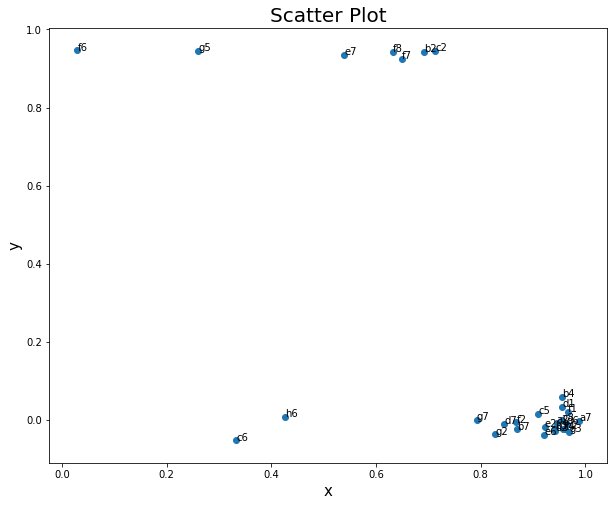

In [30]:
xs,ys = zip(*test.values())
labels = test.keys()   

# display
plt.figure(figsize=(10,8))
plt.title('Scatter Plot', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.scatter(xs, ys, marker = 'o')
for label, x, y in zip(labels, xs, ys):
    plt.annotate(label, xy = (x, y))

In [25]:
dict((key,d[key]) for d in data['K'] for key in d)


{'a2': 0.9453800985449542,
 'a7': 0.9876882778392324,
 'b2': 0.6922295391614779,
 'b3': 0.9425587666150141,
 'b4': 0.9549818904472589,
 'b7': 0.8696108409981574,
 'c2': 0.7133017808061318,
 'c4': 0.9578021060176113,
 'c5': 0.9098839767568269,
 'c6': 0.3331027485020211,
 'c8': 0.9558865700200613,
 'd1': 0.9558425874491577,
 'd2': 0.942637466571014,
 'd6': 0.9646600635027892,
 'd7': 0.8445839399368266,
 'e2': 0.9228941644504467,
 'e6': 0.9210330469927825,
 'e7': 0.5390862689019325,
 'f1': 0.9671604687529303,
 'f2': 0.8681252665876423,
 'f6': 0.029045615154328384,
 'f7': 0.6495024313726013,
 'f8': 0.6322148626562375,
 'g2': 0.8281425479633365,
 'g3': 0.9690580222178694,
 'g5': 0.26019838250145155,
 'g7': 0.7928112086105085,
 'h2': 0.9604620391924457,
 'h6': 0.4265972715321453}

In [ ]:
for p_id, p_info in evaluation.items():
    for key in p_info:
        if key=='qAfter':
            print(p_info[key])
            

In [ ]:

dd = defaultdict(list)

for d in (d_a, d_b): # you can list as many input dicts as you want here
    for key, value in d.items():
        dd[key].append(value)

print(dd)

In [ ]:
evaluation

In [ ]:
file_name=f'file/prova.json'
for e in ['a','b']:
    if e=='a':
        d =  {"FEN":FEN,
                "BEST_MOVE":chess.Move.uci(bestmove),   
                 "EXPERT":df_sarfa.loc[(df_sarfa['fen']==FEN)]['saliencyGroundTruth'].tolist(),
                 "SARFA":[{key:value} for key, value in dict_sal.items()],
                 "Q-VALUE":[{p_id:p_info[key]} for p_id, p_info in evaluation.items() for key in p_info if key=='Q-Value'],
                 "K":[{p_id:p_info[key]} for p_id, p_info in evaluation.items() for key in p_info if key=='K'],
                 "DP":[{p_id:p_info[key]} for p_id, p_info in evaluation.items() for key in p_info if key=='dP']
            }
        with open(file_name, 'w') as json_file:
            json.dump(d, json_file)
    else:
        c= {"IYER":[{key:value} for key, value in dict_sal.items()]}
        with open(file_name, "r+") as file:
            data = json.load(file)
            data.update(c)
            file.seek(0)
            json.dump(data, file)
        
        


In [ ]:
for p_id, p_info in evaluation.items():
    for key in p_info:
        if key=='dP':
            print("features "+p_id+" "+key + ':', p_info[key])